In [18]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

from __future__ import print_function, division

import numpy as np
import eos_integrate
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", dpi=144)
import scipy.optimize
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


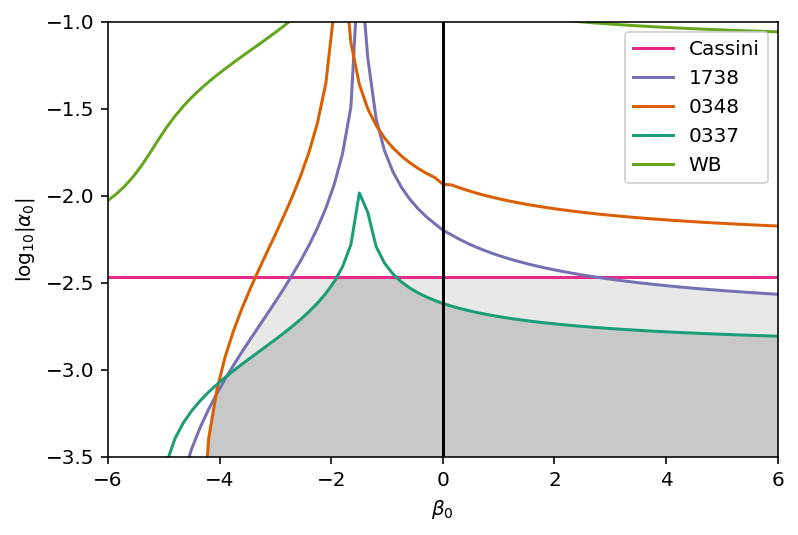

In [33]:
d = pickle.load(open("alpha-beta.pickle","rb"))
d["alphas"].keys()
colorbrewer_out = """
#1b9e77
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
"""
cbout = [c.strip() for c in colorbrewer_out.split() if c.strip()]
colors = dict(zip(sorted(d["alphas"].keys()), cbout))

pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in d["alphas"].keys():
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), "-", color=colors[k], label=k)
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
plt.fill_between(d["betas"], np.log10(pr_old), -10, 
                 color="lightgray", alpha=0.5) 
plt.fill_between(d["betas"], np.log10(pr_new), -10, 
                 color="darkgray", alpha=0.5) 
plt.axvline(0, color="k")
plt.xlim(-6,6)
plt.ylim(-3.5,-1.)
plt.legend(loc="best")
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.savefig("alpha-beta.pdf")